# Objective- To classify the given dataset into 'Musk' or 'Non-Musk' using Deep Learning approach.

In [4]:
### Importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, f1_score, precision_score,recall_score

In [5]:
#Reading Data
df = pd.read_csv('/Users/mohdsaquib/downloads/musk_csv.csv')

In [10]:
## Getting the head of data 
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [8]:
df.shape

(6598, 170)

## Observation
The dataset consists of 6598 data points and 170 features.


In [11]:
df.tail()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,...,40,124,-14,-30,107,171,-44,-115,118,0


In [41]:
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [42]:
df.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=117)

In [134]:
print('MUSK', round(df['class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('NON MUSK', round(df['class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

MUSK 15.41 % of the dataset
NON MUSK 84.59 % of the dataset


## Observation
*The molecule have two classes MUSK and NON MUSK.*
*MUSK - CLASS = 1*,
*NON MUSK - CLASS = 0*,
*The Dataset is Imbalanced as it contains 15.41% MUSK compunds and 84.59% NON-MUSK Compunds.*

# Data Cleaning

## 1. Check for Duplicates

In [12]:
print('No of duplicates:{}'.format(sum(df.duplicated())))

No of duplicates:0


## 2. Check for NaN/null values

In [21]:
print('We have {} NaN/Null values in Data'.format(df.isna().values.sum()))


We have 0 NaN/Null values in Data


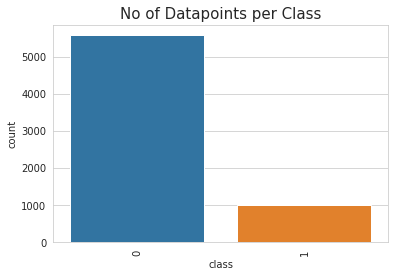

In [20]:
plt.title('No of Datapoints per Class', fontsize=15)
sns.countplot(df['class'])
plt.xticks(rotation=90)
plt.show()

# Correlation Matrix

In [135]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.92
to_drop = [column for column in upper.columns if any(upper[column] > 0.92)]

In [136]:
df = df.drop(columns = to_drop)

## Observation
Dropping features which have higher correlation

In [137]:
df.shape

(6598, 117)

# Train-Test split

In [142]:
# Train-test split
train,test = train_test_split(df, random_state=30, test_size = 0.2)
X_train = train.iloc[:,3:-1]
Y_train = train.iloc[:,-1:]
X_test = test.iloc[:,3:-1]
Y_test = test.iloc[:,-1:]
X_train.shape


(5278, 113)

In [143]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [144]:
a=[1]*X_train.shape[0]
X_train["demo"]=a
X_train.shape

(5278, 114)

In [145]:
b=[1]*X_test.shape[0]
X_test["demo"]=b
X_test.shape

(1320, 114)

In [146]:
x_train=X_train.values.reshape(X_train.shape[0],19,6,1)
x_test=X_test.values.reshape(X_test.shape[0],19,6,1)

In [147]:
x_train.shape

(5278, 19, 6, 1)

In [148]:
x_test.shape

(1320, 19, 6, 1)

# CNN(Convulational Neural Network)

In [173]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(19,6,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [150]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [151]:
history = model.fit(x_train,Y_train,batch_size=128,epochs=17,validation_data=(x_test,Y_test))
score=model.evaluate(x_test,Y_test,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/17
5278/5278 [==============================] - 4s 681us/step - loss: 2.5070 - acc: 0.8333 - val_loss: 2.2972 - val_acc: 0.8568
Epoch 2/17
5278/5278 [==============================] - 2s 312us/step - loss: 1.9493 - acc: 0.8535 - val_loss: 0.8337 - val_acc: 0.9235
Epoch 3/17
5278/5278 [==============================] - 2s 411us/step - loss: 0.5961 - acc: 0.8858 - val_loss: 0.2031 - val_acc: 0.9000
Epoch 4/17
5278/5278 [==============================] - 2s 423us/step - loss: 0.2695 - acc: 0.9032 - val_loss: 0.1423 - val_acc: 0.9424
Epoch 5/17
5278/5278 [==============================] - 2s 365us/step - loss: 0.2113 - acc: 0.9176 - val_loss: 0.1166 - val_acc: 0.9553
Epoch 6/17
5278/5278 [==============================] - 2s 352us/step - loss: 0.1657 - acc: 0.9291 - val_loss: 0.1085 - val_acc: 0.9598
Epoch 7/17
5278/5278 [==============================] - 2s 368us/step - loss: 0.1570 - acc: 0.9326 - val_loss: 0.1019 - val_acc: 0.9621


# Performance Measurement

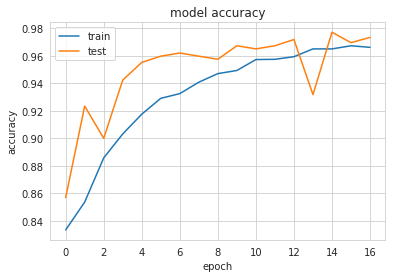

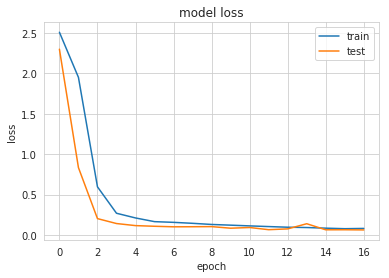

In [152]:
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [154]:
print("f1_score:",f1_score(Y_test,model.predict_classes(x_test),))
print("recall:",recall_score(Y_test,model.predict_classes(x_test),))
print("precision:",precision_score(Y_test,model.predict_classes(x_test),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.9095607235142118
recall: 0.9312169312169312
precision: 0.8888888888888888
Validation Loss: 0.06340843768733921
Validation Accuracy: 0.9734848484848485


## Observation
Using CNN we get the Accuracy of 97%. 
### We know that the data set is imbalanced, let us try sampling technique and see if it affects or not.

# Random Under Sampling

In [155]:
### Random Under Sampling

# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of Musk classes 1016 rows.
Musk = df.loc[df['class'] == 1]
Non_Musk = df.loc[df['class'] == 0][:1016]

normal_distributed_df = pd.concat([Musk, Non_Musk])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
185,186,MUSK-215,215_1+37,48,-198,-104,-82,-117,-44,37,...,-75,17,49,196,160,141,-60,-119,47,1
358,359,MUSK-217,217_2+22,40,-199,-98,15,-117,-8,24,...,-51,22,35,85,132,170,-58,-134,87,1
123,124,MUSK-213,213_1+76,39,-194,-146,27,292,75,57,...,-125,-141,-132,82,18,308,-64,-301,-7,1
919,920,MUSK-jf47,jf47_1+3,46,-192,-151,33,-117,-75,43,...,-220,-205,19,154,133,190,-72,-175,5,1
3421,3422,NON-MUSK-288,288_1+25,51,-122,-23,-51,-117,153,-161,...,-68,163,-14,-31,106,172,-44,-116,118,0


Equally Distributing and Correlating

Distribution of the Classes in the subsample dataset
1    0.500246
0    0.499754
Name: class, dtype: float64


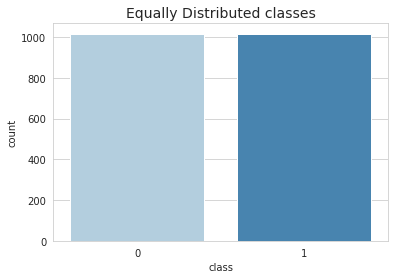

In [156]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['class'].value_counts()/len(new_df))



sns.countplot('class', data=new_df, palette='Blues')
plt.title('Equally Distributed classes', fontsize=14)
plt.show()

# CNN on Undersample dataset

In [157]:
# Train-test split
train,test = train_test_split(new_df, random_state=30, test_size = 0.2)
Xtrain = train.iloc[:,3:-1]
Ytrain = train.iloc[:,-1:]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]
Xtrain.shape


(1626, 113)

In [158]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [159]:
a=[1]*Xtrain.shape[0]
Xtrain["demo"]=a
Xtrain.shape

(1626, 114)

In [160]:
b=[1]*Xtest.shape[0]
Xtest["demo"]=b
Xtest.shape

(407, 114)

In [161]:
xtrain=Xtrain.values.reshape(Xtrain.shape[0],19,6,1)
xtest=Xtest.values.reshape(Xtest.shape[0],19,6,1)

In [162]:
xtrain.shape

(1626, 19, 6, 1)

In [163]:
xtest.shape

(407, 19, 6, 1)

### MODEL

In [166]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(19,6,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [167]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [169]:
history = model.fit(xtrain,Ytrain,batch_size=128,epochs=17,validation_data=(xtest,Ytest))
score=model.evaluate(xtest,Ytest,verbose=0)
print(score)

Train on 1626 samples, validate on 407 samples
Epoch 1/17
1626/1626 [==============================] - 1s 343us/step - loss: 0.0933 - acc: 0.9606 - val_loss: 0.1430 - val_acc: 0.9287
Epoch 2/17
1626/1626 [==============================] - 1s 344us/step - loss: 0.1327 - acc: 0.9465 - val_loss: 0.0463 - val_acc: 0.9902
Epoch 3/17
1626/1626 [==============================] - 1s 338us/step - loss: 0.0970 - acc: 0.9582 - val_loss: 0.0377 - val_acc: 0.9902
Epoch 4/17
1626/1626 [==============================] - 1s 345us/step - loss: 0.1015 - acc: 0.9619 - val_loss: 0.0369 - val_acc: 0.9902
Epoch 5/17
1626/1626 [==============================] - 1s 333us/step - loss: 0.0685 - acc: 0.9686 - val_loss: 0.0420 - val_acc: 0.9828
Epoch 6/17
1626/1626 [==============================] - 1s 336us/step - loss: 0.0713 - acc: 0.9699 - val_loss: 0.0437 - val_acc: 0.9803
Epoch 7/17
1626/1626 [==============================] - 1s 336us/step - loss: 0.0776 - acc: 0.9692 - val_loss: 0.0523 - val_acc: 0.9754
E

## Performance Measures

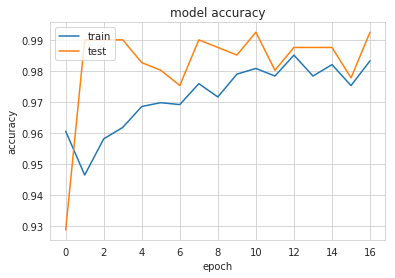

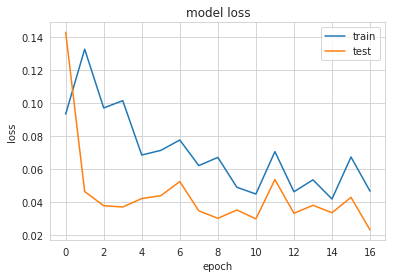

In [170]:

%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [172]:
print("f1_score:",f1_score(Ytest,model.predict_classes(xtest),))
print("recall:",recall_score(Ytest,model.predict_classes(xtest),))
print("precision:",precision_score(Ytest,model.predict_classes(xtest),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.9928741092636578
recall: 1.0
precision: 0.9858490566037735
Validation Loss: 0.022970184265047825
Validation Accuracy: 0.9926289926289926


## Observation
Random Undersampled data gives an accuracy of 99.29%

## Results
### 1). The accuracy obtained using Undersampling = 99.29%.
### 2). The accuracy obtained usind whole data without sampling = 97.3%.